<a href="https://colab.research.google.com/github/Dimpal16/Boston-house-price-prediction/blob/master/BostonHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import torch
import torch.nn as nn

# Allow plots to appear directly in the notebook
%matplotlib inline

In [0]:
# Load the data in DataFrame

from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data)

In [0]:
# Let's see how the data looks

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#Check for null values in each column

df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

In [0]:
df.columns = dataset.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
# Check the shape of the dataset

df['PRICE'] = dataset.target
df.shape

(506, 14)

In [0]:
# Checking the type of data in each column

df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [0]:
df.nunique(dropna = True)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

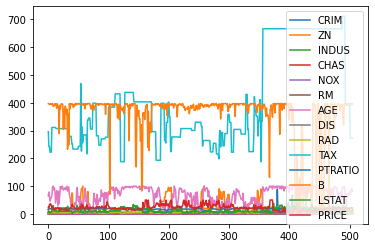

In [0]:
df.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


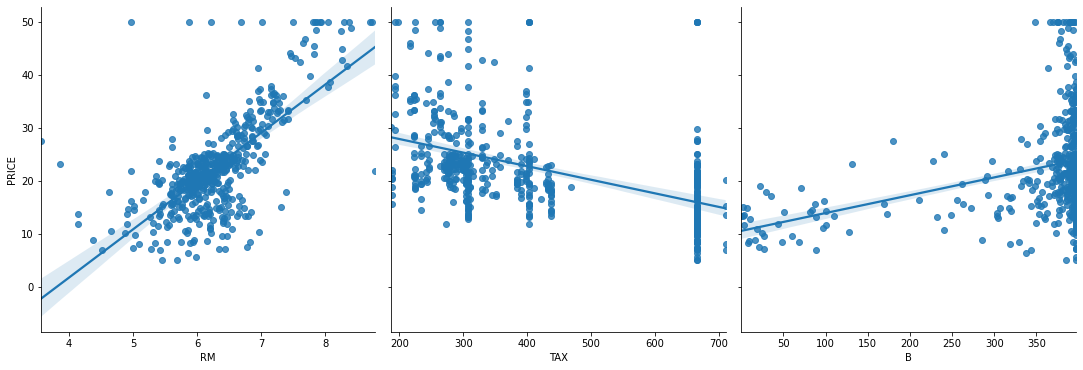

In [0]:
# Visualize the relationship betweem the features and the target using scatterplots

import seaborn as sns

sns.pairplot(df, x_vars=['RM', 'TAX', 'B'], y_vars=['PRICE'], size=5, kind='reg')

In [0]:
X = df.drop(['PRICE'], axis=1)
Y = df['PRICE']

In [0]:
# Splitting the datastet in two parts for training and testing purpose
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# **Linear Regression** 

In [0]:
# Training the model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Interpreting model coefficient

coeff = np.array(lr.coef_)
np.set_printoptions(suppress=True)

print("Y intercept: {}\n\nCoefficients of features: {}\n".format(lr.intercept_, coeff))
print("Length of coefficient matrix: ", len(lr.coef_))

print("\n", list(zip(df.columns, coeff)))

Y intercept: 29.844531561572534

Coefficients of features: [ -0.09748729   0.04371509   0.00424646   2.94264697 -18.82365177
   4.62851743  -0.00305781  -1.32336756   0.31408858  -0.01224225
  -0.96230667   0.01104849  -0.41482664]

Length of coefficient matrix:  13

 [('CRIM', -0.09748729200498073), ('ZN', 0.04371508525932765), ('INDUS', 0.004246455202785865), ('CHAS', 2.942646966412754), ('NOX', -18.823651773724965), ('RM', 4.628517433388803), ('AGE', -0.0030578092200025256), ('DIS', -1.3233675648996774), ('RAD', 0.31408857653433003), ('TAX', -0.012242251074968992), ('PTRATIO', -0.9623066650277984), ('B', 0.011048489987804586), ('LSTAT', -0.4148266392127189)]


In [0]:
# Predicting the prices

y_pred = linear_model.predict(x_test)
print(len(y_pred))

152


In [0]:
linear_model.score(x_test, y_test)

0.6492811207405532

In [0]:
# calculate MAE, MSE, RMSE

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print("\nActual Price \t Predicted Price")
# for i, j in zip(y_test, y_pred):
    # print(i, "\t\t", j)

MAE:  3.605839713773659
MSE:  27.432003583916686
RMSE:  5.237557024407151


# **Polynomial Regression**

In [0]:
# Convert the dataframe to numpy ndarray

df_new = df.to_numpy(dtype = 'float')

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
polynomial_features = PolynomialFeatures(degree=2)

x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)
print(x_poly.shape)

(354, 105)


In [0]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_poly_pred = poly_model.predict(x_test_poly)

In [0]:
poly_model.score(x_test_poly, y_test)

0.8057885987403641

In [0]:
print(y_test.shape, y_poly_pred.shape)


(152,) (152,)


In [0]:
# calculate MAE, MSE, RMSE

print("MAE: ", metrics.mean_absolute_error(y_test, y_poly_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_poly_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

# print("\nActual Price \t Predicted Price")
# for i, j in zip(y_test, y_poly_pred):
    # print(i, "\t\t", j)

MAE:  2.942786719297108
MSE:  15.190536268367456
RMSE:  3.897503850975321


# **Neural Network**

In [0]:
from torch import nn
from sklearn.preprocessing import MinMaxScaler
import torch

In [0]:
# Converting the train/test data to torch tensors:    
# dataFrame -> numpy array -> torch tensor

X_train = torch.tensor(np.array(x_train))
Y_train = torch.tensor(np.array(y_train))
X_test = torch.tensor(np.array(x_test))
Y_test = torch.tensor(np.array(y_test))


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

torch.Size([354, 13]) torch.Size([354])
torch.Size([152, 13]) torch.Size([152])


In [0]:
# Normalization of data
min_max_scaler = MinMaxScaler()
X_train_scale = min_max_scaler.fit_transform(x_train)
X_test_scale = min_max_scaler.fit_transform(x_test)

In [0]:


class Neural_Network(nn.Module):
  def __init__(self, n_feature):
    super(Neural_Network, self).__init__()
    self.layer1 = nn.Linear(n_feature, 10)
    self.layer2 = nn.Linear(10, 6)
    self.layer3 = nn.Linear(6, 1)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.functional.relu(x)
    x = self.layer2(x)
    x = nn.functional.relu(x)
    x = self.layer3(x)
    x = nn.functional.relu(x)

    return x

In [0]:
model = Neural_Network(13)
model = model.double()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)          # try with Adam: torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()

print(model)

Neural_Network(
  (layer1): Linear(in_features=13, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=6, bias=True)
  (layer3): Linear(in_features=6, out_features=1, bias=True)
)


In [0]:
Y_pred_nn = model(X_train)

test_loss = loss_func(Y_pred_nn, Y_train)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([354])) that is different to the input size (torch.Size([354, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [0]:
# Write the training loop